In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
def merge_diff_grid(xmin, xmax, y1, y2):
    """Cast discrete quantities with different spacings to a common grid.
    Piecewise constant interpolation.
    """
    n1 = len(y1)
    n2 = len(y2)
    x1 = np.linspace(xmin, xmax, n1, endpoint=False)
    x2 = np.linspace(xmin, xmax, n2, endpoint=False)

    i_sort = np.argsort(np.concatenate([x1,x2]))
    i1 = i_sort<n1
    i2 = i_sort>=n1

    x3 = np.zeros(n1+n2)
    x3[i1] = x1
    x3[i2] = x2

    z1 = np.zeros_like(x3)
    z2 = np.zeros_like(x3)

    z1[i1] = y1
    z2[i2] = y2

    for i in range(n1):
        wh = np.logical_and(
            i2,
            x3>x1[i]
        )
        z1[wh] = y1[i]

    for i in range(n2):
        wh = np.logical_and(
            i1,
            x3>x2[i]
        )
        z2[wh] = y2[i]
        
    return x3, z1, z2

def diff_uneven(xmin, xmax, y1, y2):
    "Integral of absolute difference between discrete quantities with different spacings."
    x, z1, z2 = merge_diff_grid(xmin, xmax, y1, y2)
    
    return np.sum(np.abs(
        (z1-z2) * np.diff(np.concatenate([x,[xmax]]))
    ))


In [123]:
xmin = 0
xmax = 20
N = 10
n1 = N*3
n2 = N*8
d1 = (xmax-xmin)/n1
d2 = (xmax-xmin)/n2

x1 = np.linspace(xmin+d1/2, xmax-d1/2, n1)
x2 = np.linspace(xmin+d2/2, xmax-d2/2, n2)

def f(x):
    return np.sin(x)

y1 = f(x1)
y2 = f(x2)

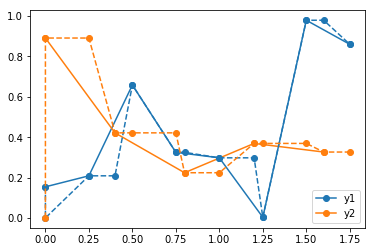

In [100]:
x3, x1, z2 = 
plt.plot(x1, y1, 'C0o-', label='y1')
plt.plot(x2, y2, 'C1o-', label='y2')
plt.plot(x3, z1, 'C0o--')
plt.plot(x3, z2, 'C1o--')
plt.legend()
plt.show()

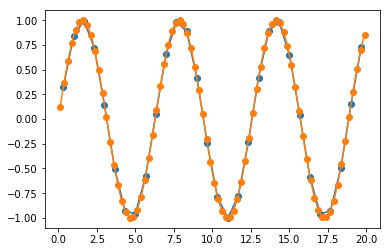

2.5641993743272327

In [123]:
plt.plot(x1, y1, 'o-', label='y1')
plt.plot(x2, y2, 'o-', label='y2')
plt.show()

diff_uneven(xmin, xmax, y1, y2)